
<center>
        <h1>CS 251/340 Machine Learning</h1>
        <h2>AUA, Spring 2021</h2>
        <h1>Using PyTorch to generate music<h1>

</center>

In [ ]:
#@title  { form-width: "1px" }
from music21 import *

#uploading file from computer
import os
#Array Processing
import numpy as np
import random

!pip install mingus
import mingus.core.notes as mingus_note

from collections import Counter

#library for visualiation
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#for Neural Networks
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

from keras.models import load_model

#for playing midi
from IPython.display import Audio
import tqdm

     |████████████████████████████████| 143kB 6.7MB/s 


# Reading MIDI file

In [ ]:
#@title  { form-width: "1px" }

#Returns the array of notes and chords present in the musical file.
def read_midi(file):

    print("Loading the music file: ",file)

    chordes = []
    notes=[]
    notes_to_parse = None
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        #if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                # #note
                # if isinstance(element, note.Note):
                #     notes.append(mingus_note.note_to_int(str(element.pitch)[0]))
                    

                #chord
                if isinstance(element, chord.Chord):
                    a = '.'.join(str(n) for n in element.pitches) #changed element.pitchClasses                    notes.append(max([n.pitch.midi for n in element]))
                    notes.append(max([n.pitch.midi for n in element])%12)
                    chordes.append(a)
                  
    print(chordes)
    return  np.array([notes,chordes])
#np.array(chordes)

# **Function to convert list of notes/chordes back to MIDI**

In [ ]:
#@title  { form-width: "1px" }

def convert_to_midi(prediction_output,file_name):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                # cn=int(current_note)
                cn=current_note
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp=file_name)
    return midi_stream
    

# **Reading MIDI files from the uploaded folder**

In [ ]:
#@title  { form-width: "1px" }


#specify the path
path2='/bin/data/'


#read the melody file
melody_file = [i for i in os.listdir(path2) if i.endswith(".mid")]
melody_notes_array = [read_midi(path2+i) for i in melody_file]


#print(notes_array1)
print(melody_notes_array)

for i in melody_notes_array:
  print(i)

Loading the music file:  /bin/data/Project_data_final.mid
['C3.E4.G4.C5', 'E3.E4.G4.B4', 'G3.D4.G4.B4', 'D3.D4.F4.A4', 'F3.C4.F4.A4', 'C3.C4.E4.G4', 'E3.B3.E4.G4', 'E3.B3.E4.G4', 'E3.B3.E4.G4', 'C3.C4.E4.G4', 'A2.C4.E4.A4', 'F2.C4.F4.A4', 'C3.C4.E4.G4', 'C3.C4.E4.G4', 'G2.B3.D4.G4', 'C3.C4.E4.G4', 'C3.C4.E4.G4', 'F3.C4.F4.A4', 'D3.D4.F4.A4', 'G3.D4.G4.B4', 'C3.E4.G4.C5', 'F3.F4.A4.C5', 'F3.F4.A4.C5', 'D3.F4.A4.D5', 'D3.F4.A4.D5', 'G3.G4.B4.D5', 'C3.G4.C5.E5', 'E3.G4.B4.E5', 'G3.G4.B4.D5', 'C3.G4.C5.E5', 'C4.E4.G4', 'G3.B3.D4.G4', 'E3.B3.E4.G4', 'A3.C4.E4.A4', 'F3.C4.F4.A4', 'D3.D4.F4.A4', 'G3.D4.G4.B4', 'G3.D4.G4.B4', 'C4.E4.G4.C5', 'C4.E4.G4.C5', 'G3.D4.G4.B4', 'E3.E4.G4.B4', 'A3.E4.A4.C5', 'D3.F4.A4.D5', 'G3.G4.B4.D5', 'C4.G4.C5.E5', 'F3.A4.C5.F5', 'A3.A4.C5.E5', 'A3.A4.C5.E5', 'F3.A4.C5.F5', 'D3.A4.D5.F5', 'A3.A4.C5.E5', 'A3.A4.C5.E5', 'F3.A4.C5.F5', 'C4.G4.C5.E5', 'G3.G4.B4.D5', 'E3.G4.B4.E5', 'C3.G4.C5.E5', 'G3.G4.B4.D5', 'C3.G4.C5.E5', 'C3.G3.C4.E4', 'G3.B3.D4', 'E4.B3.G3.E3', 'C

# **Reading notes**

In [ ]:
#@title  { form-width: "1px" }

#Returns the array of notes and chords present in the musical file.
def read_midi_notes(file):

    print("Loading the music file: ",file)

    chordes = []
    notes=[]
    notes_to_parse = None
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        #if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                # #note
                 if isinstance(element, note.Note):
                     notes.append(mingus_note.note_to_int(str(element.pitch)[0]))
    
    return  notes
#np.array(chordes)

In [ ]:
path_for_notes ='/bin/Armenian_anthem_notes/'
notes_file = [i for i in os.listdir(path_for_notes) if i.endswith(".mid")]
notes_notes_array = [read_midi_notes(path_for_notes+i) for i in notes_file]

Loading the music file:  /bin/Armenian_anthem_notes/ՀԽՍՀ_հիմն_վերջնական.mid


# **Notes to int**

In [ ]:
#@title  { form-width: "1px" }

import math
def convertToNumber (s):
    return int.from_bytes(s.encode(), 'little')

def convertFromNumber (n):
    return n.to_bytes(math.ceil(n.bit_length() / 8), 'little').decode()

# **Prepearing data for classification**

In [ ]:
#@title  { form-width: "1px" }

for i in melody_notes_array:
  feature = i[0]
  label = i[1]

y = label
X = []

X_test_int = []
#puting each note in features into a list
for i in feature:
  X.append(int(i))
  X_test_int.append([int(i)])
# y = []
# for i in label:
#   y.append(convertToNumber(i))

X = np.eye(12,dtype=np.int)[X]


# **Prepearing data for prediction**

In [ ]:
def arr_to_eye(array):
  result_list = []
  for i in array:
    arr = np.zeros(12,dtype=int)
    arr[i] = 1
    result_list.append(arr)
  return np.array(result_list)

In [ ]:
#@title  { form-width: "1px" }

X_test_eye_vector = arr_to_eye(notes_notes_array[0])
print(X_test_eye_vector)


[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
# X_y = list(zip(X, y))
# X, y = map(list, zip(*X_y))

print(X)
print(len(y))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]]
3371


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
clf = LogisticRegression(random_state=0,max_iter = 50000, fit_intercept=False).fit(X_train, y_train)
print(clf.score(X_test, y_test))
predicted = clf.predict(X_test)
#print(predicted)

X_anthem_predicted = clf.predict(X_test_eye_vector)
print(y)

0.12
['C3.E4.G4.C5' 'E3.E4.G4.B4' 'G3.D4.G4.B4' ... 'G2.E4.G4.C5' 'G2.D4.F4.B4'
 'C2.C4.E4.C5']


In [ ]:
print(X_anthem_predicted)

In [ ]:
convert_to_midi(X_anthem_predicted, "Logistic_Regression_predicted_anthem")

<music21.stream.Stream 0x7f54d2e03050>

# **Decision Tree**

In [ ]:
#@title  { form-width: "1px" }

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))

predicted = tree.predict(X_test)
#convert_to_midi(predicted)

0.11407407407407408


# **Comparing all classifications**

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.104228 (0.015162)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.047873 (0.021019)
CART: 0.105715 (0.013114)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.105715 (0.013114)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.105711 (0.015496)


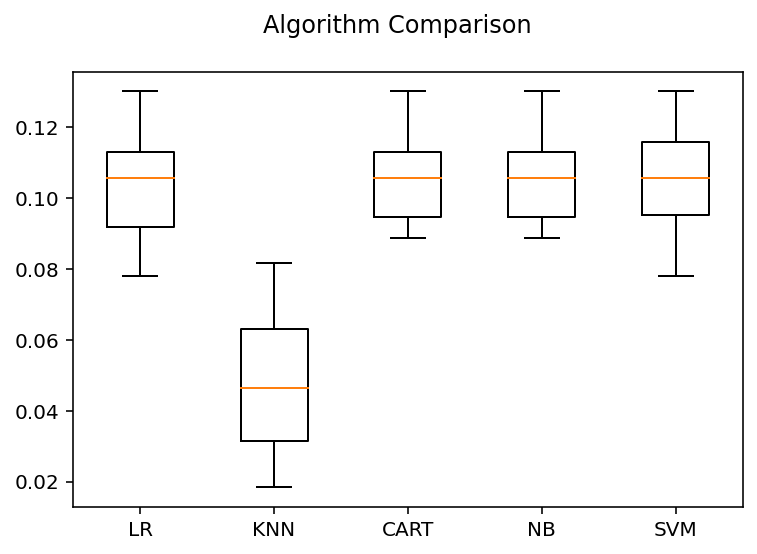

In [ ]:
#@title  { form-width: "1px" }

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Removing single chords and double chords

In [ ]:
#@title  { form-width: "1px" }

def remove_double_single_chordes(chordes):
  new_list = chordes.copy()
  for i in new_list:
    if i.count('.') == 1:
      chordes.remove(i)
    elif len(i) <= 2:
      chordes.remove(i)
  return chordes



# **Setting up Neural Network**

In [ ]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 
import tensorflow as tf


class RNN(nn.Module):
    # implement RNN from scratch rather than using nn.RNN
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input_tensor, hidden_tensor):
        # print(input_tensor.shape)
        # print(hidden_tensor.shape)

        combined = torch.cat((input_tensor, hidden_tensor), 1)
        
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)
    


[618 607 631 ...  43 712 697]


<BarContainer object of 872 artists>

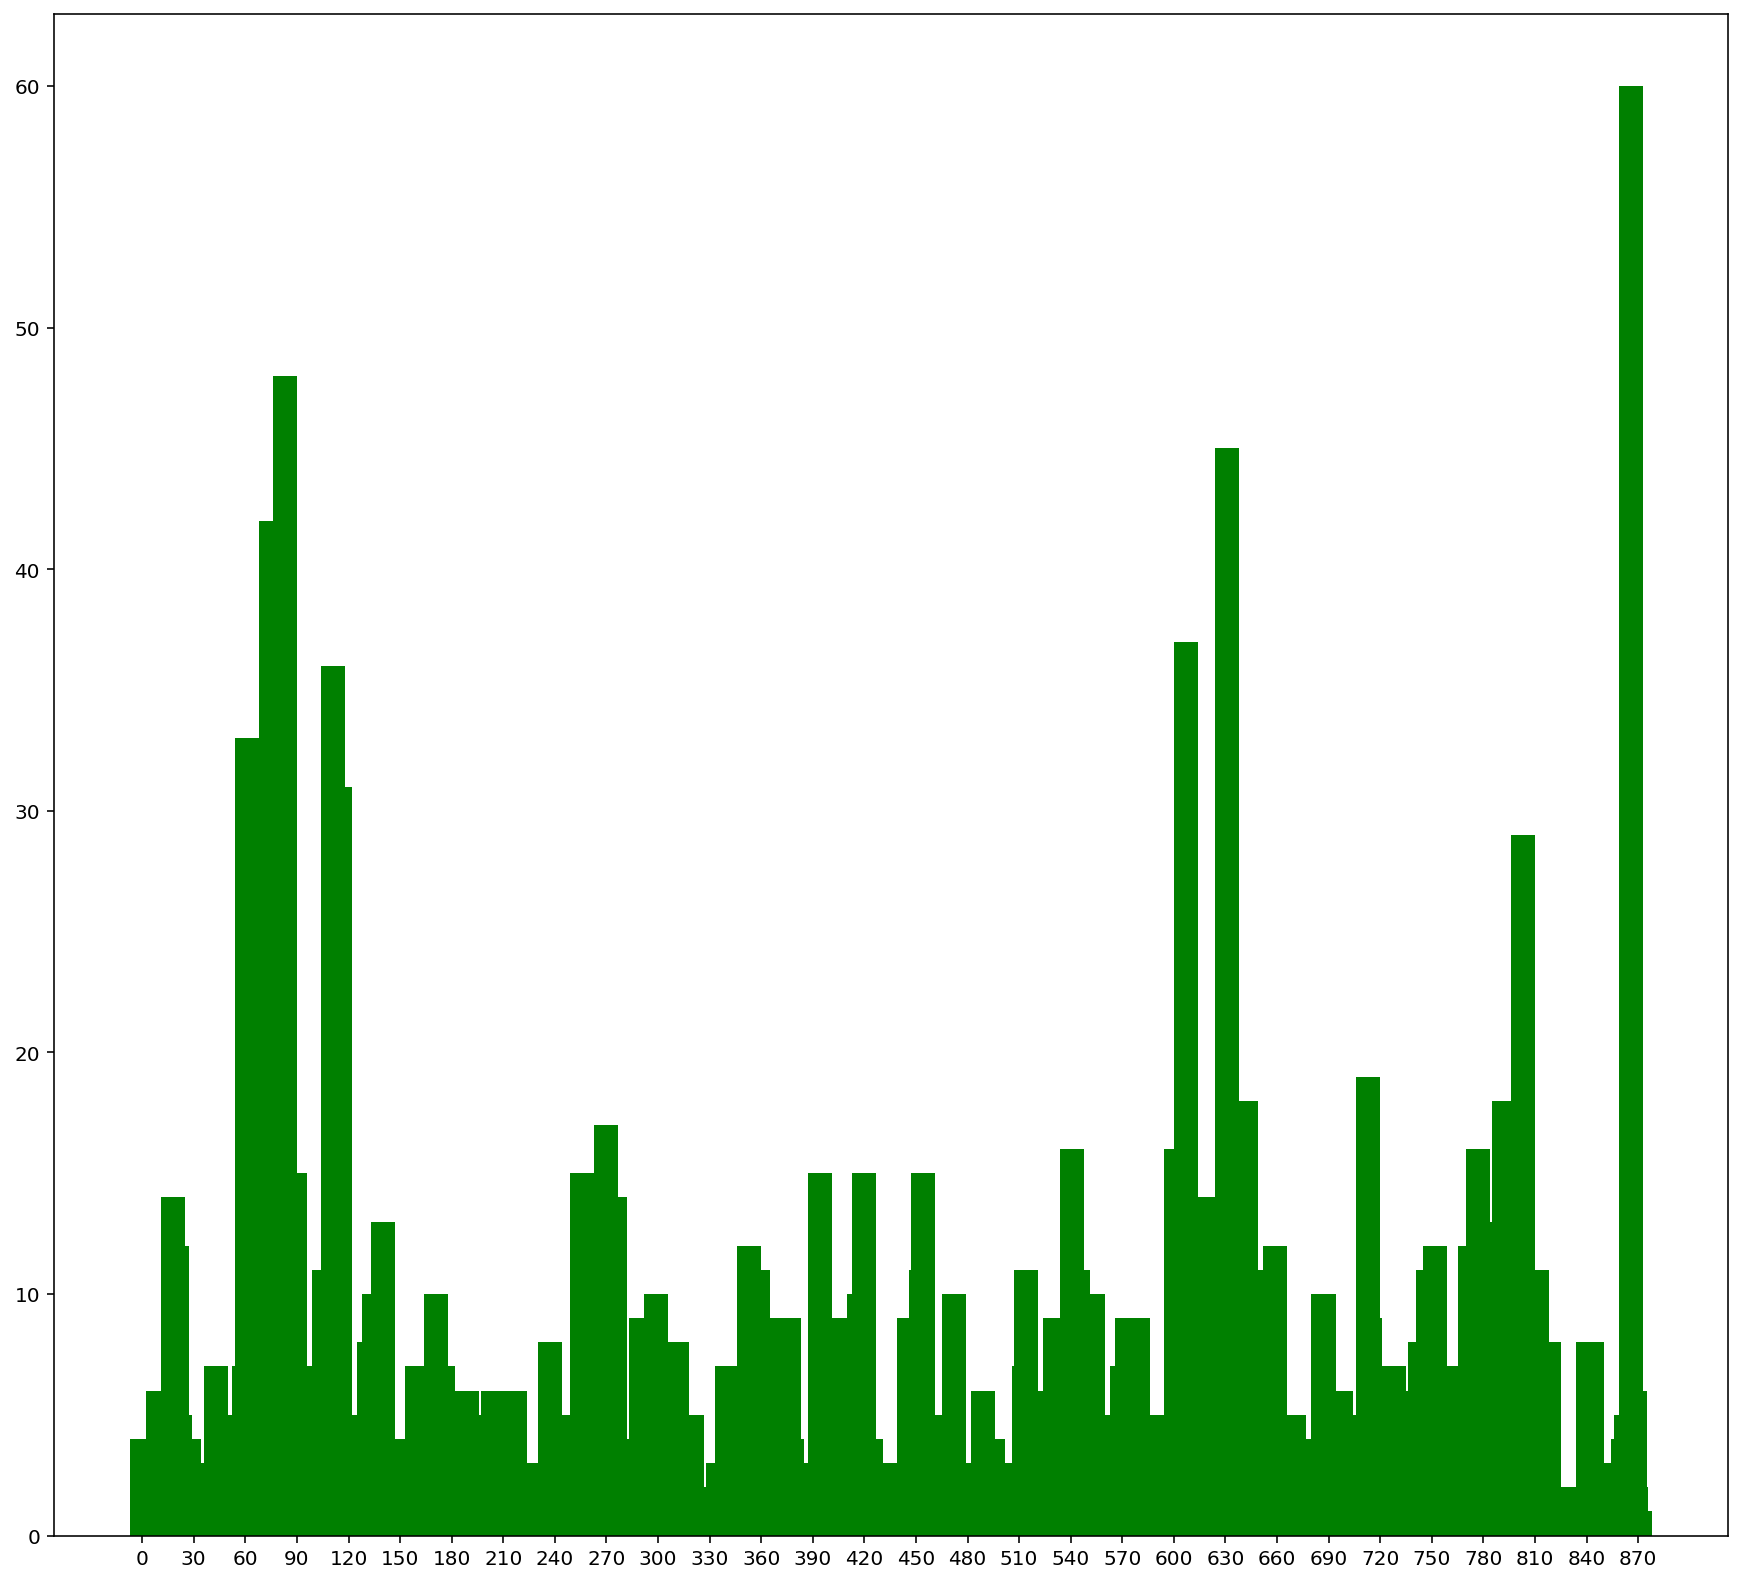

In [ ]:
chords_set = set(y_train)
chords_set = list(chords_set)
y_unique = []

for i in y_train:
  #print(chords_set.index(i))
  y_unique.append(torch.tensor(chords_set.index(i)))  
   

y_unique = torch.stack(y_unique)
print(np.array(y_unique))

def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

import matplotlib.pyplot as plt
h = count_elements(np.array(y_unique))


plt.figure(figsize=(15, 14))
plt.xticks(np.arange(0, len(h)+1, 30))
plt.yticks(np.arange(0, 80, 10))
plt.bar(h.keys(), h.values(), 14, color='g')

Getting the names for the chords

In [ ]:
category_lines = dict(zip(y,X))
all_categories = y_unique
n_categories = len(chords_set)

In [ ]:
n_hidden = 256
rnn = RNN(len(X_train[0]), n_hidden, n_categories)

x = torch.tensor(X_train)

# one step
input_tensor = x[0]
hidden_tensor = rnn.init_hidden()


output, next_hidden = rnn(input_tensor[None], hidden_tensor)
print(output.size())
print(next_hidden.size())

# whole sequence/name
input_tensor = x
hidden_tensor = rnn.init_hidden()

torch.Size([1, 872])
torch.Size([1, 256])


In [ ]:
def category_from_output(output):
    category_idx = torch.argmax(output).item()
    return chords_set[category_idx]

print(category_from_output(output))

#Negative Log Liklihood Loss
criterion = nn.NLLLoss()
learning_rate = 0.00000000000000005
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)



def train(line_tensor, category_tensor):
    hidden = rnn.init_hidden()
    loss_list = []
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i][None], hidden)
        
        loss = criterion(output, category_tensor[i][None])
        loss_list.append(loss)

    optimizer.zero_grad()
    loss = sum(loss_list)
    loss.backward()
    optimizer.step()
    
    return output, loss.item()


E3.G4.B4.E5


In [ ]:
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000
n_iters = 5000

line_tensor = torch.tensor(X_train)
category_tensor = y_unique
outer = tqdm.tqdm(total=n_iters, desc='Epoch', position=0)
for i in range(n_iters):
    #category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)

    output, loss = train(line_tensor, category_tensor)
    current_loss += loss 
    outer.update(1)
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        guess = category_from_output(output)
        #correct = "CORRECT" if guess == category else f"WRONG ({category})"
      #  print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f} {line} / {guess} {correct}")
        
    
plt.figure()
plt.plot(all_losses)
plt.show()

def predict(input_line):
    print(f"\n> {input_line}")
    with torch.no_grad():
        line_tensor = input_line
        guess_list = []
        hidden = rnn.init_hidden()
    
        for i in range(line_tensor.size()[0]):
            output, hidden = rnn(line_tensor[i][None], hidden)
            guess = category_from_output(output)
            guess_list.append(guess)
        return guess_list
    

Epoch:   0%|          | 2/5000 [00:04<3:21:51,  2.42s/it]

KeyboardInterrupt: ignored

In [ ]:
#this is for predicting chordes for Armenian national anthem
new_melody = torch.tensor(X_test_eye_vector)
a = predict(new_melody)

In [ ]:
print("The accuracy for the RNN is: ")
print(sum(y_test == predict(torch.tensor(X_test))))

In [ ]:
convert_to_midi(a,"RNN_anthem_predicted")